# **Import the required packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray
from math import sqrt

# **Import the image**

In [ ]:
#Now we will do the morphological operations on image of sunflower
from google.colab import files
uploaded = files.upload()

Saving Picture1.jpg to Picture1 (1).jpg


In [ ]:
virus = imread('Picture1.jpg')

**#Convert the image to Binary**

Text(0.5, 1.0, 'Binary')

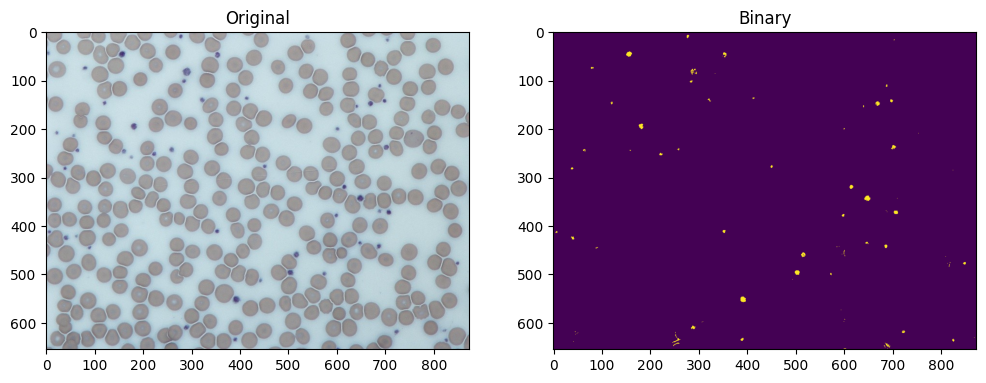

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(virus);
ax[0].set_title('Original')

binary = rgb2gray(virus)<0.45
ax[1].imshow(binary)
ax[1].set_title('Binary')

# **Create structural element for Erosion and Dilution**

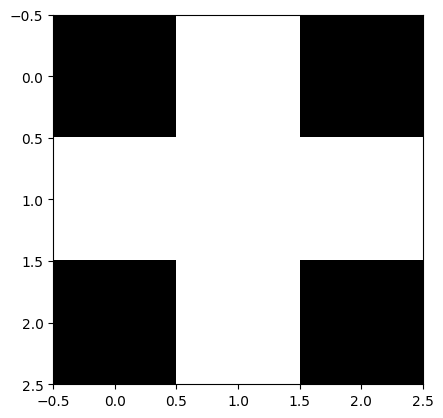

In [ ]:
#we will create structural element to be used in erosion and dilation
x = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
plt.imshow(x, cmap='gray');

Text(0.5, 1.0, 'Binary')

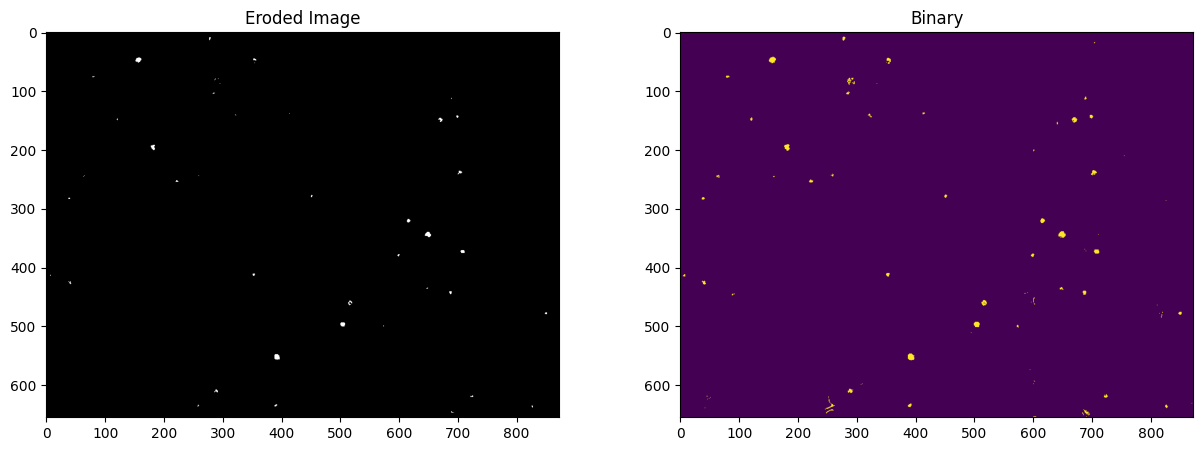

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(15, 5))
ax[0].imshow(erosion(binary, x), cmap='gray');
ax[0].set_title('Eroded Image')

ax[1].imshow(binary)
ax[1].set_title('Binary')

In [ ]:
#multiple erosion
def multi_erosion(image, num, x=x):
    for i in range(num):
        image = erosion(image, x)
    return image

In [ ]:
def multi_dilution(image, num, x=x):
    for i in range(num):
        image = dilation(image, x)
    return image


<ipython-input-9-eda45d6c3769>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(Eroded_Image)


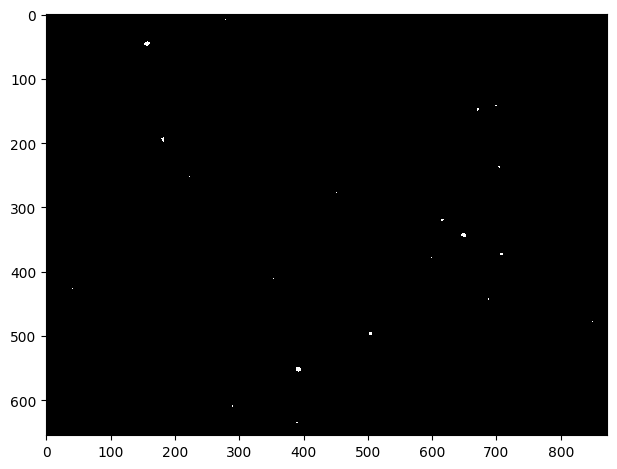

In [ ]:
#apply multiple erosion
Eroded_Image = multi_erosion(binary, 2, x)
imshow(Eroded_Image)

Text(0.5, 1.0, 'Binary')

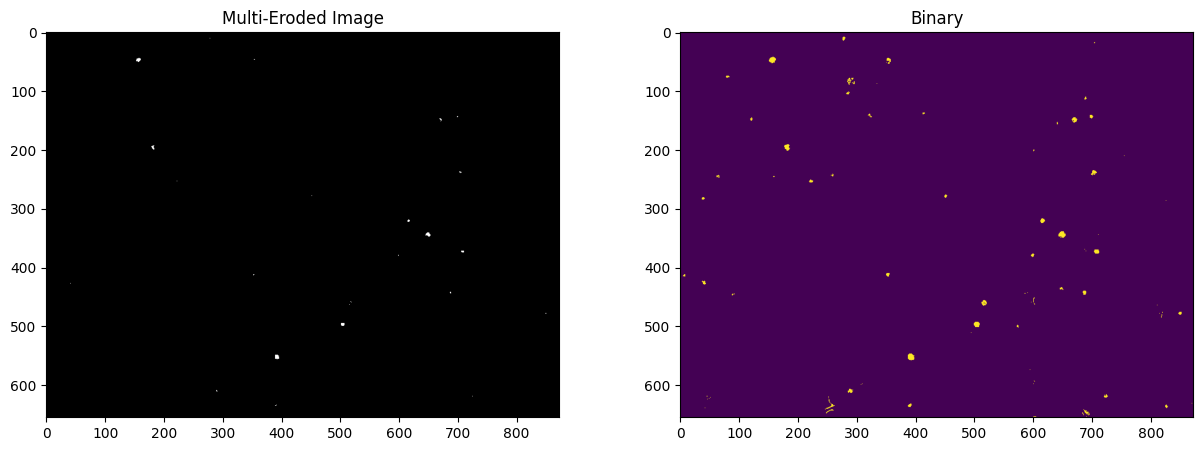

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_erosion(binary, 2, x), cmap='gray')
ax[0].set_title('Multi-Eroded Image')


ax[1].imshow(binary)
ax[1].set_title('Binary')

<ipython-input-24-a166b066c118>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(opened_image)


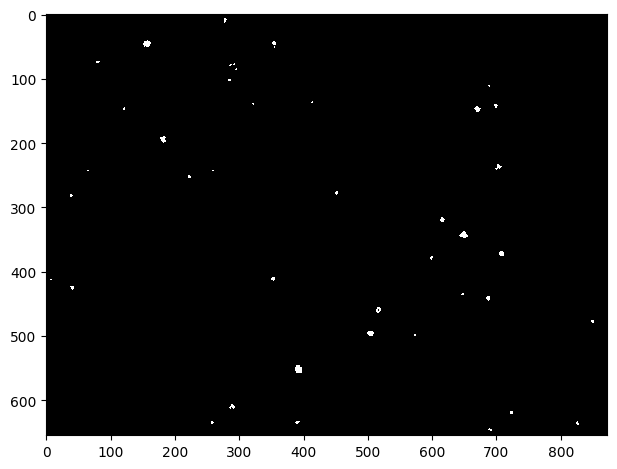

In [ ]:
#we will apply the opening function to remove any minor noise left
opened_image = opening(binary)
imshow(opened_image)

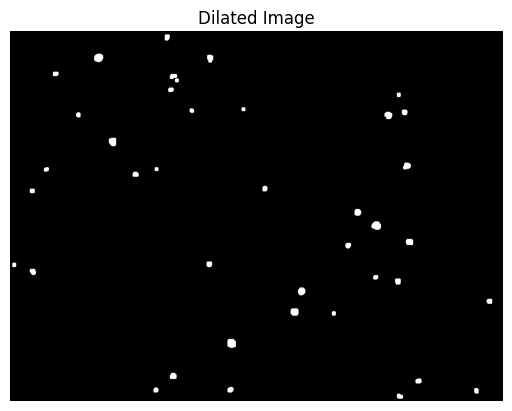

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert binary image to uint8 (0 and 255 values)
opened_image = (opened_image * 255).astype(np.uint8)

# Define a structuring element (kernel)
kernel = np.ones((3,3), np.uint8)

# Apply dilation
dilated_image = cv2.dilate(opened_image, kernel, iterations=2)

# Display the result
plt.imshow(dilated_image, cmap='gray')
plt.title("Dilated Image")
plt.axis('off')
plt.show()


<ipython-input-30-0f471b41076a>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(morphed_image)
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


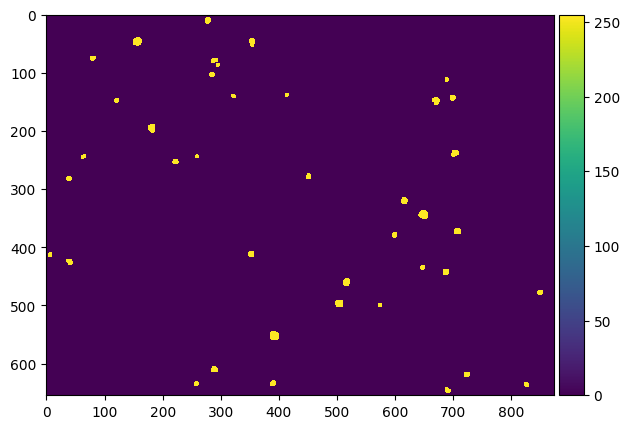

In [ ]:
#make the image more clear by using area function
#it does not use a structural element but a deframed shape basis the threshold
morphed_image = area_opening(area_closing(dilated_image, 10), 10)
imshow(morphed_image)

# **Blob Detection using LoG, DoG, and DoH**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.feature import blob_dog, blob_log, blob_doh

In [ ]:
cells_morphed =morphed_image

Laplacian of Gaussian (LoG) on this binarized image
We will be only setting the min_sigma parameter on all methods.
The rest will be the default parameter setting.

# Laplacian of Gaussian (LoG)

In [ ]:
blobs = blob_log(cells_morphed, min_sigma=1,threshold=0.1)

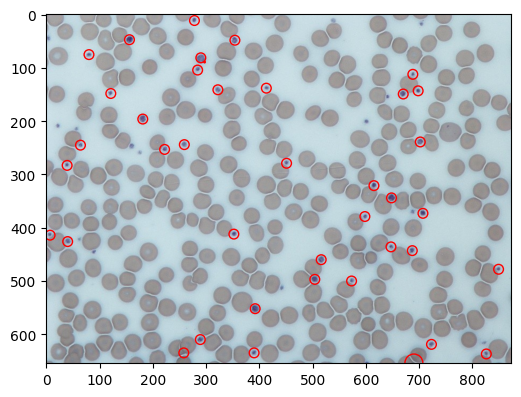

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2),
                 color='r', fill=False))

In [ ]:
# Calculate the detected features in an image (blobs). This can have wider application and use cases
blobs[:, 2] = blobs[:, 2] * sqrt(2)
numrows = len(blobs)

In [ ]:
print("blob counts",numrows)

blob counts 40


# Difference of Gaussian (DoG)

In [ ]:
#Difference of Gaussian (DoG)
blobs = blob_dog(cells_morphed, min_sigma=1,threshold=0.1)

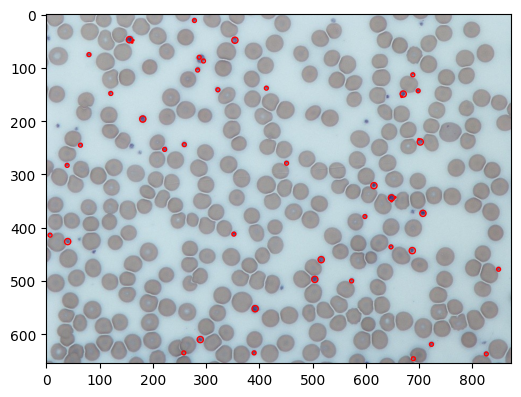

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2),
                 color='r', fill=False))

# Determinant of Hessian (DoH)

In [ ]:
blobs = blob_doh(cells_morphed, min_sigma=1)

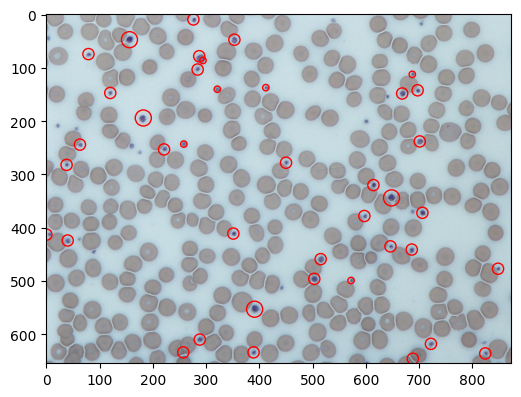

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2),
                 color='r', fill=False))